In [1]:
import os
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
train_paths =glob('/Users/eunchankim/Desktop/dataset/cifar/train/*.png')
test_paths = glob('/Users/eunchankim/Desktop/dataset/cifar/test/*.png')

In [10]:
len(train_paths), len(test_paths)

(50000, 10000)

In [11]:
path = train_paths[0]
path

'/Users/eunchankim/Desktop/dataset/cifar/train/32270_deer.png'

In [19]:
fname = os.path.basename(path)
cls_name= fname.replace('.png', '').split('_')[-1]

In [20]:
cls_name

'deer'

### class 이름 얻은 것을 함수로 묶기

# Class 수 확인

In [43]:
# class name 만 뽑는 함수

def get_class_name(path):
    fname = os.path.basename(path)
    cls_name= fname.replace('.png', '').split('_')[-1]
    return cls_name

In [44]:
cls_name = get_class(path)
cls_name

'deer'

In [45]:
path, cls_name

('/Users/eunchankim/Desktop/dataset/cifar/train/46506_deer.png', 'deer')

In [46]:
class_names = []
for path in train_paths:
    cls_name = get_class_name(path)
    class_names.append(cls_name)

In [47]:
#list comprehension
#class_name = [get_class_name(path) for path in train_paths]

In [48]:
len(class_names)

50000

In [49]:
np.unique(class_names)

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

In [51]:
uniques = np.unique(class_names, return_counts=True)

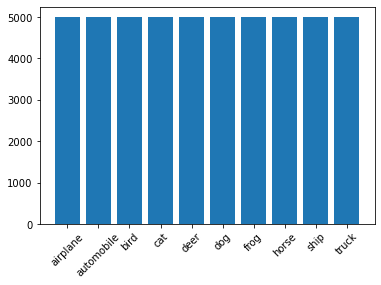

In [53]:
plt.bar(*uniques) #앞에다 *를 높으면 array를 풀어준다.
plt.xticks(rotation = 45)
plt.show()

# DataFrame 생성

파이썬에서 csv 또는 excel을 다룰 때 사용되는 library  
주로 엑셀과 같이 테이블 형식으로 되어있는 데이터들을 다룹니다  

In [61]:
train_paths[0], class_names[0]

('/Users/eunchankim/Desktop/dataset/cifar/train/32270_deer.png', 'deer')

In [62]:
data = {'name': train_paths, 'class':class_names}

In [65]:
train_df = pd.DataFrame(data)

In [74]:
train_df.head()

,name,class
0,/Users/eunchankim/Desktop/dataset/cifar/train/...,deer
1,/Users/eunchankim/Desktop/dataset/cifar/train/...,cat
2,/Users/eunchankim/Desktop/dataset/cifar/train/...,deer
3,/Users/eunchankim/Desktop/dataset/cifar/train/...,truck
4,/Users/eunchankim/Desktop/dataset/cifar/train/...,automobile


In [67]:
test_name = [get_class_name(path) for path in test_paths]

In [70]:
test_data = {'name': test_paths, 'class':test_name}

In [71]:
test_df = pd.DataFrame(test_data)

In [73]:
test_df.head()

,name,class
0,/Users/eunchankim/Desktop/dataset/cifar/test/2...,cat
1,/Users/eunchankim/Desktop/dataset/cifar/test/7...,horse
2,/Users/eunchankim/Desktop/dataset/cifar/test/6...,deer
3,/Users/eunchankim/Desktop/dataset/cifar/test/2...,horse
4,/Users/eunchankim/Desktop/dataset/cifar/test/8...,automobile


## 만들어진 DataFrame 저장

In [80]:
pwd

'/Users/eunchankim'

In [77]:
train_csv_path = 'train_dataset.csv'
test_csv_path = 'test_dataset.csv'

In [81]:
# csv 파일 생성 index 없이
train_df.to_csv(train_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)

## Data 확인

In [82]:
from PIL import Image
from tqdm import tqdm_notebook

In [83]:
heigths = []
widths = []

In [84]:
for path in tqdm_notebook(train_paths):
    img_pil = Image.open(path)
    image = np.array(img_pil)
    h, w, c = image.shape
    
    heigths.append(h)
    widths.append(w)

<ipython-input-84-d441add9c493>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for path in tqdm_notebook(train_paths):


  0%|          | 0/50000 [00:00<?, ?it/s]

In [85]:
np.unique(heigths), np.unique(widths)

(array([32]), array([32]))